# Convolutional NN

In [18]:
import tensorflow as tf

In [19]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np

In [20]:
mnist = tf.keras.datasets.mnist

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [22]:
printable_train_images = train_images
printable_test_images = test_images

In [23]:
print(train_images.shape)

(60000, 28, 28)


In [26]:
train_images = train_images.reshape((60000,28,28,1)) # change format so each image is flattened into array

BEFORE:



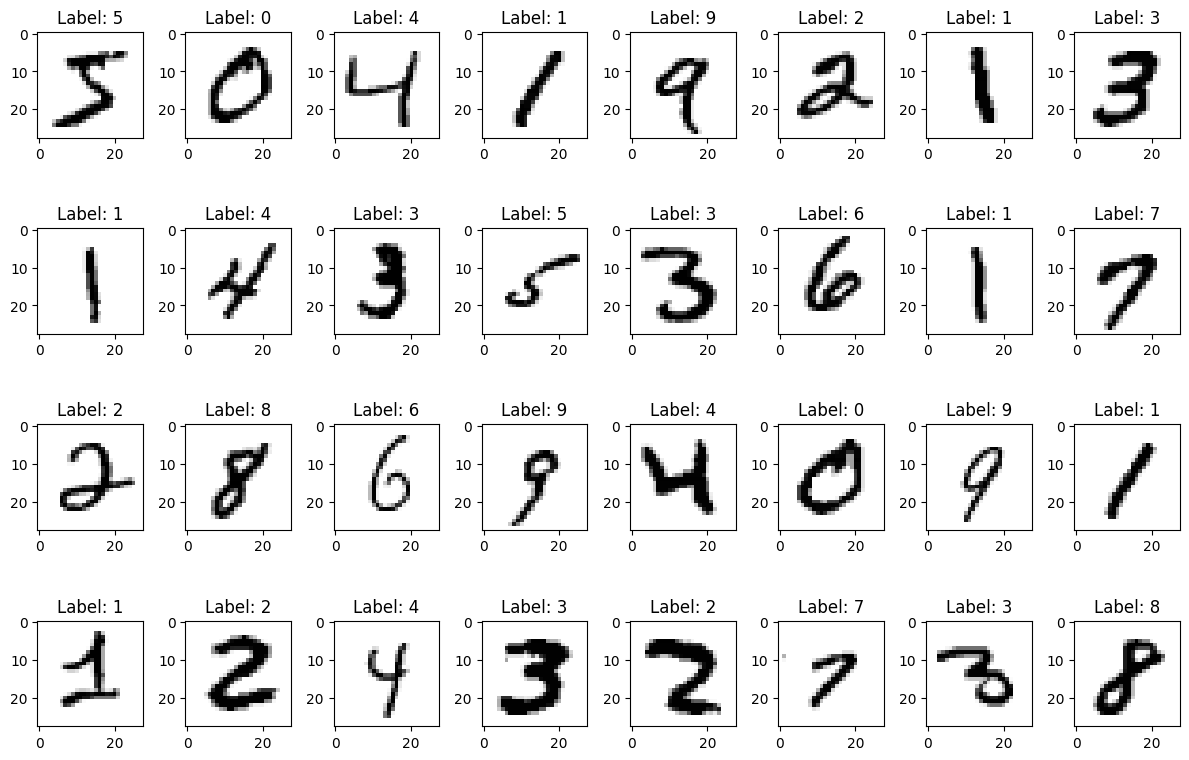

AFTER:



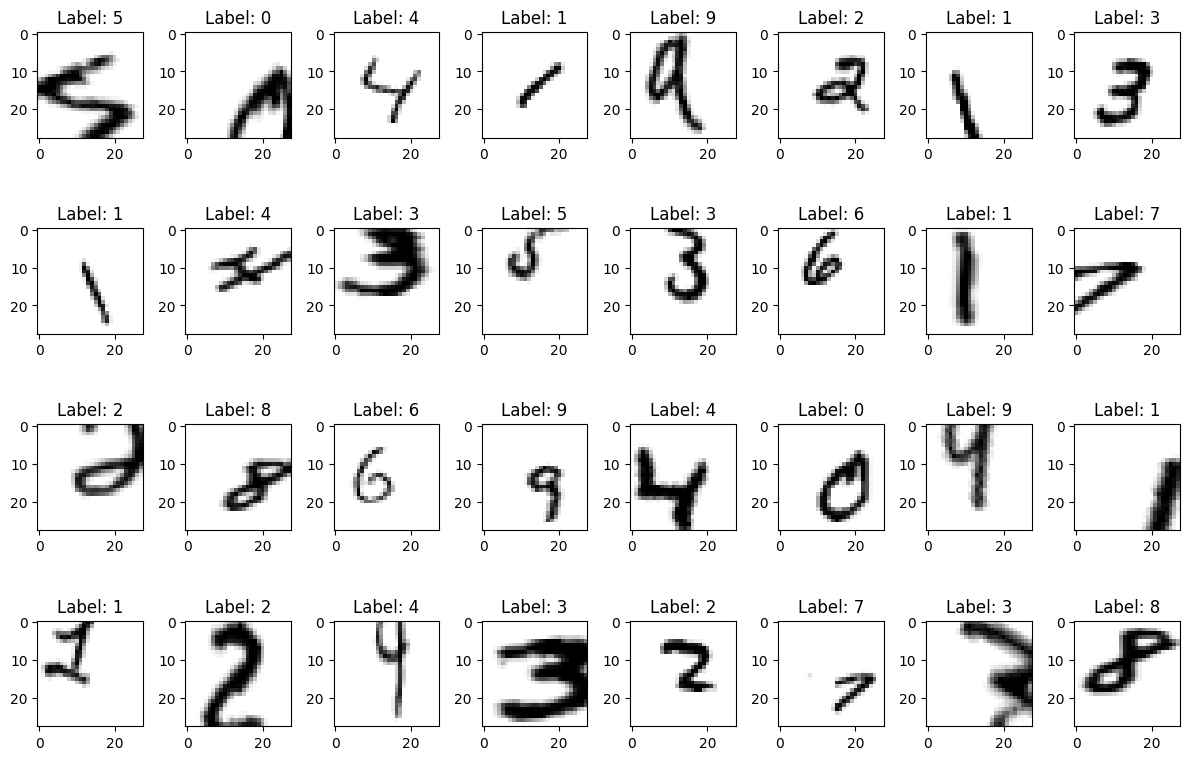

In [27]:
# specify the arguments
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_range_val=45
zoom_range_val=[0.5,1.5]
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val,)
# fit the generator
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')

fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1),train_labels.reshape(train_labels.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [33]:
# specify the arguments
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_range_val=45
zoom_range_val=[0.5,1.5]
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val,)
# fit the generator
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

train_images_new = None
train_labels_new = None
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1),train_labels.reshape(train_labels.shape[0], 1),batch_size=60000,shuffle=False):
    train_images_new = X
    train_labels_new = Y
    break

(60000, 28, 28, 1)


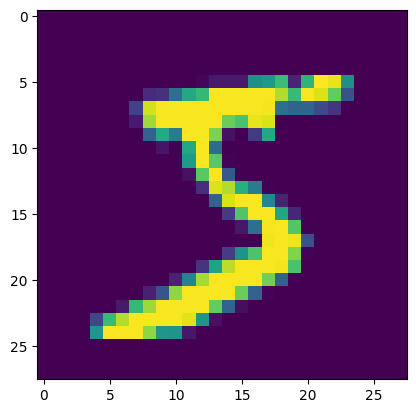

In [53]:
plt.imshow(train_images[0])

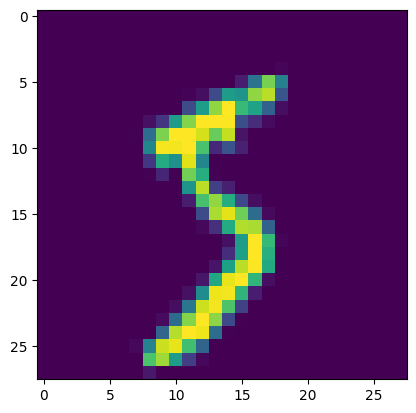

In [54]:
plt.imshow(train_images_new[0])

In [55]:
print(train_images.shape)
print(train_images_new.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [56]:
print(train_labels.shape)
print(train_labels_new.shape)

(60000,)
(60000, 1)


# normalize to a value between 0 and 1

In [57]:
train_images = train_images.astype('float32') / 255.0

In [58]:
print(train_images[50])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [59]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32') / 255.0

# One hot encode

In [60]:
train_labels = tf.keras.utils.to_categorical(train_labels)

In [61]:
test_labels = tf.keras.utils.to_categorical(test_labels)

In [62]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Model

In [64]:
model = tf.keras.models.Sequential([
    # convolution layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Convolution2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Convolution2D(64,(3,3), activation='relu'),
    tf.keras.layers.Flatten(), # unwrap rows into a single row
    
    # fully connected layer
    tf.keras.layers.Dense(64, activation='relu'),
    
    # output layer
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [66]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 23s 23ms/step - loss: 0.1736 - accuracy: 0.9447
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0309 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 28s 29ms/step - loss: 0.0187 - accuracy: 0.9943


In [68]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9929


[0.019702522084116936, 0.992900013923645]

## export model to tensorflow js

In [33]:
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, "tfjsmodel")

# Show prediction

In [70]:
predictions = model.predict([test_images])

313/313 [==============================] - 2s 5ms/step


guess:4
[4.6910276e-10 5.4243866e-08 1.4869447e-07 2.7804733e-12 9.9999954e+01
 7.2294193e-09 1.3542298e-07 3.9788890e-08 2.3546343e-06 4.3851825e-05]


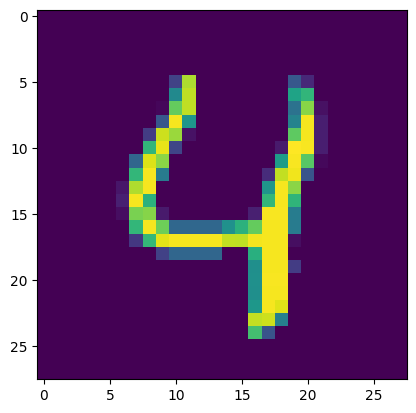

In [79]:
index = 
print(f"guess:{np.argmax(predictions[index])}")
print(predictions[index] * 100)
plt.imshow(printable_test_images[index])

# Visualize Filters

Model has an array of matrices.

In [36]:
all_layers = model.layers

In [37]:
filters, biases = all_layers[0].get_weights()

In [38]:
print(filters.shape)

(3, 3, 1, 32)


In [39]:
figure1 = plt.figure(figsize=(8,12))

<Figure size 800x1200 with 0 Axes>

In [40]:
columns = 6
rows = 6

In [41]:
n_filters = 32

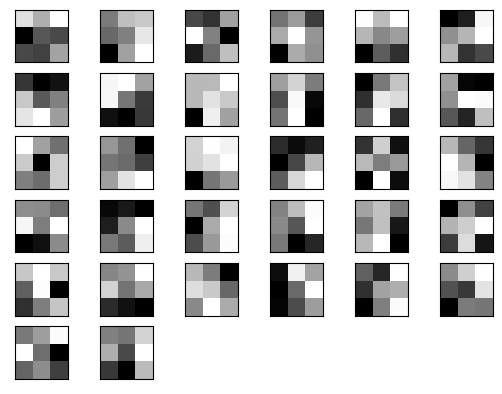

In [42]:
for i in range(1, n_filters+1):
    f = filters[:,:,:,i-1]
    figure1 = plt.subplot(rows,columns,i)
    figure1.set_xticks( [] ) # get rid of ticks on x axis
    figure1.set_yticks( [] )
    plt.imshow(f[:,:,0], cmap='gray')
plt.show()
# white is high value in the filter, black is low value

In [43]:
conv_layers_indices = [0,2,4]
outputs = [ model.layers[i].output for i in conv_layers_indices ] #pick out all of the convolutional layers

In [44]:
outputs


[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'conv2d_2')>]

In [45]:
model_shortened = tf.keras.models.Model(inputs = model.inputs, outputs= outputs)

In [46]:
model_shortened.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

1/1 [==============================] - 0s 49ms/step


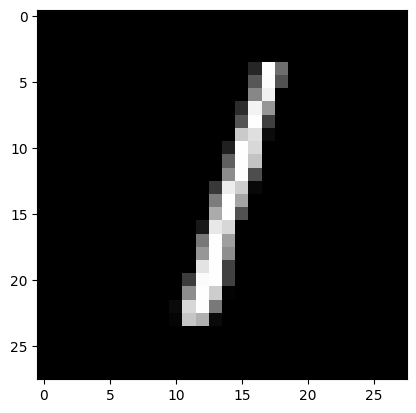

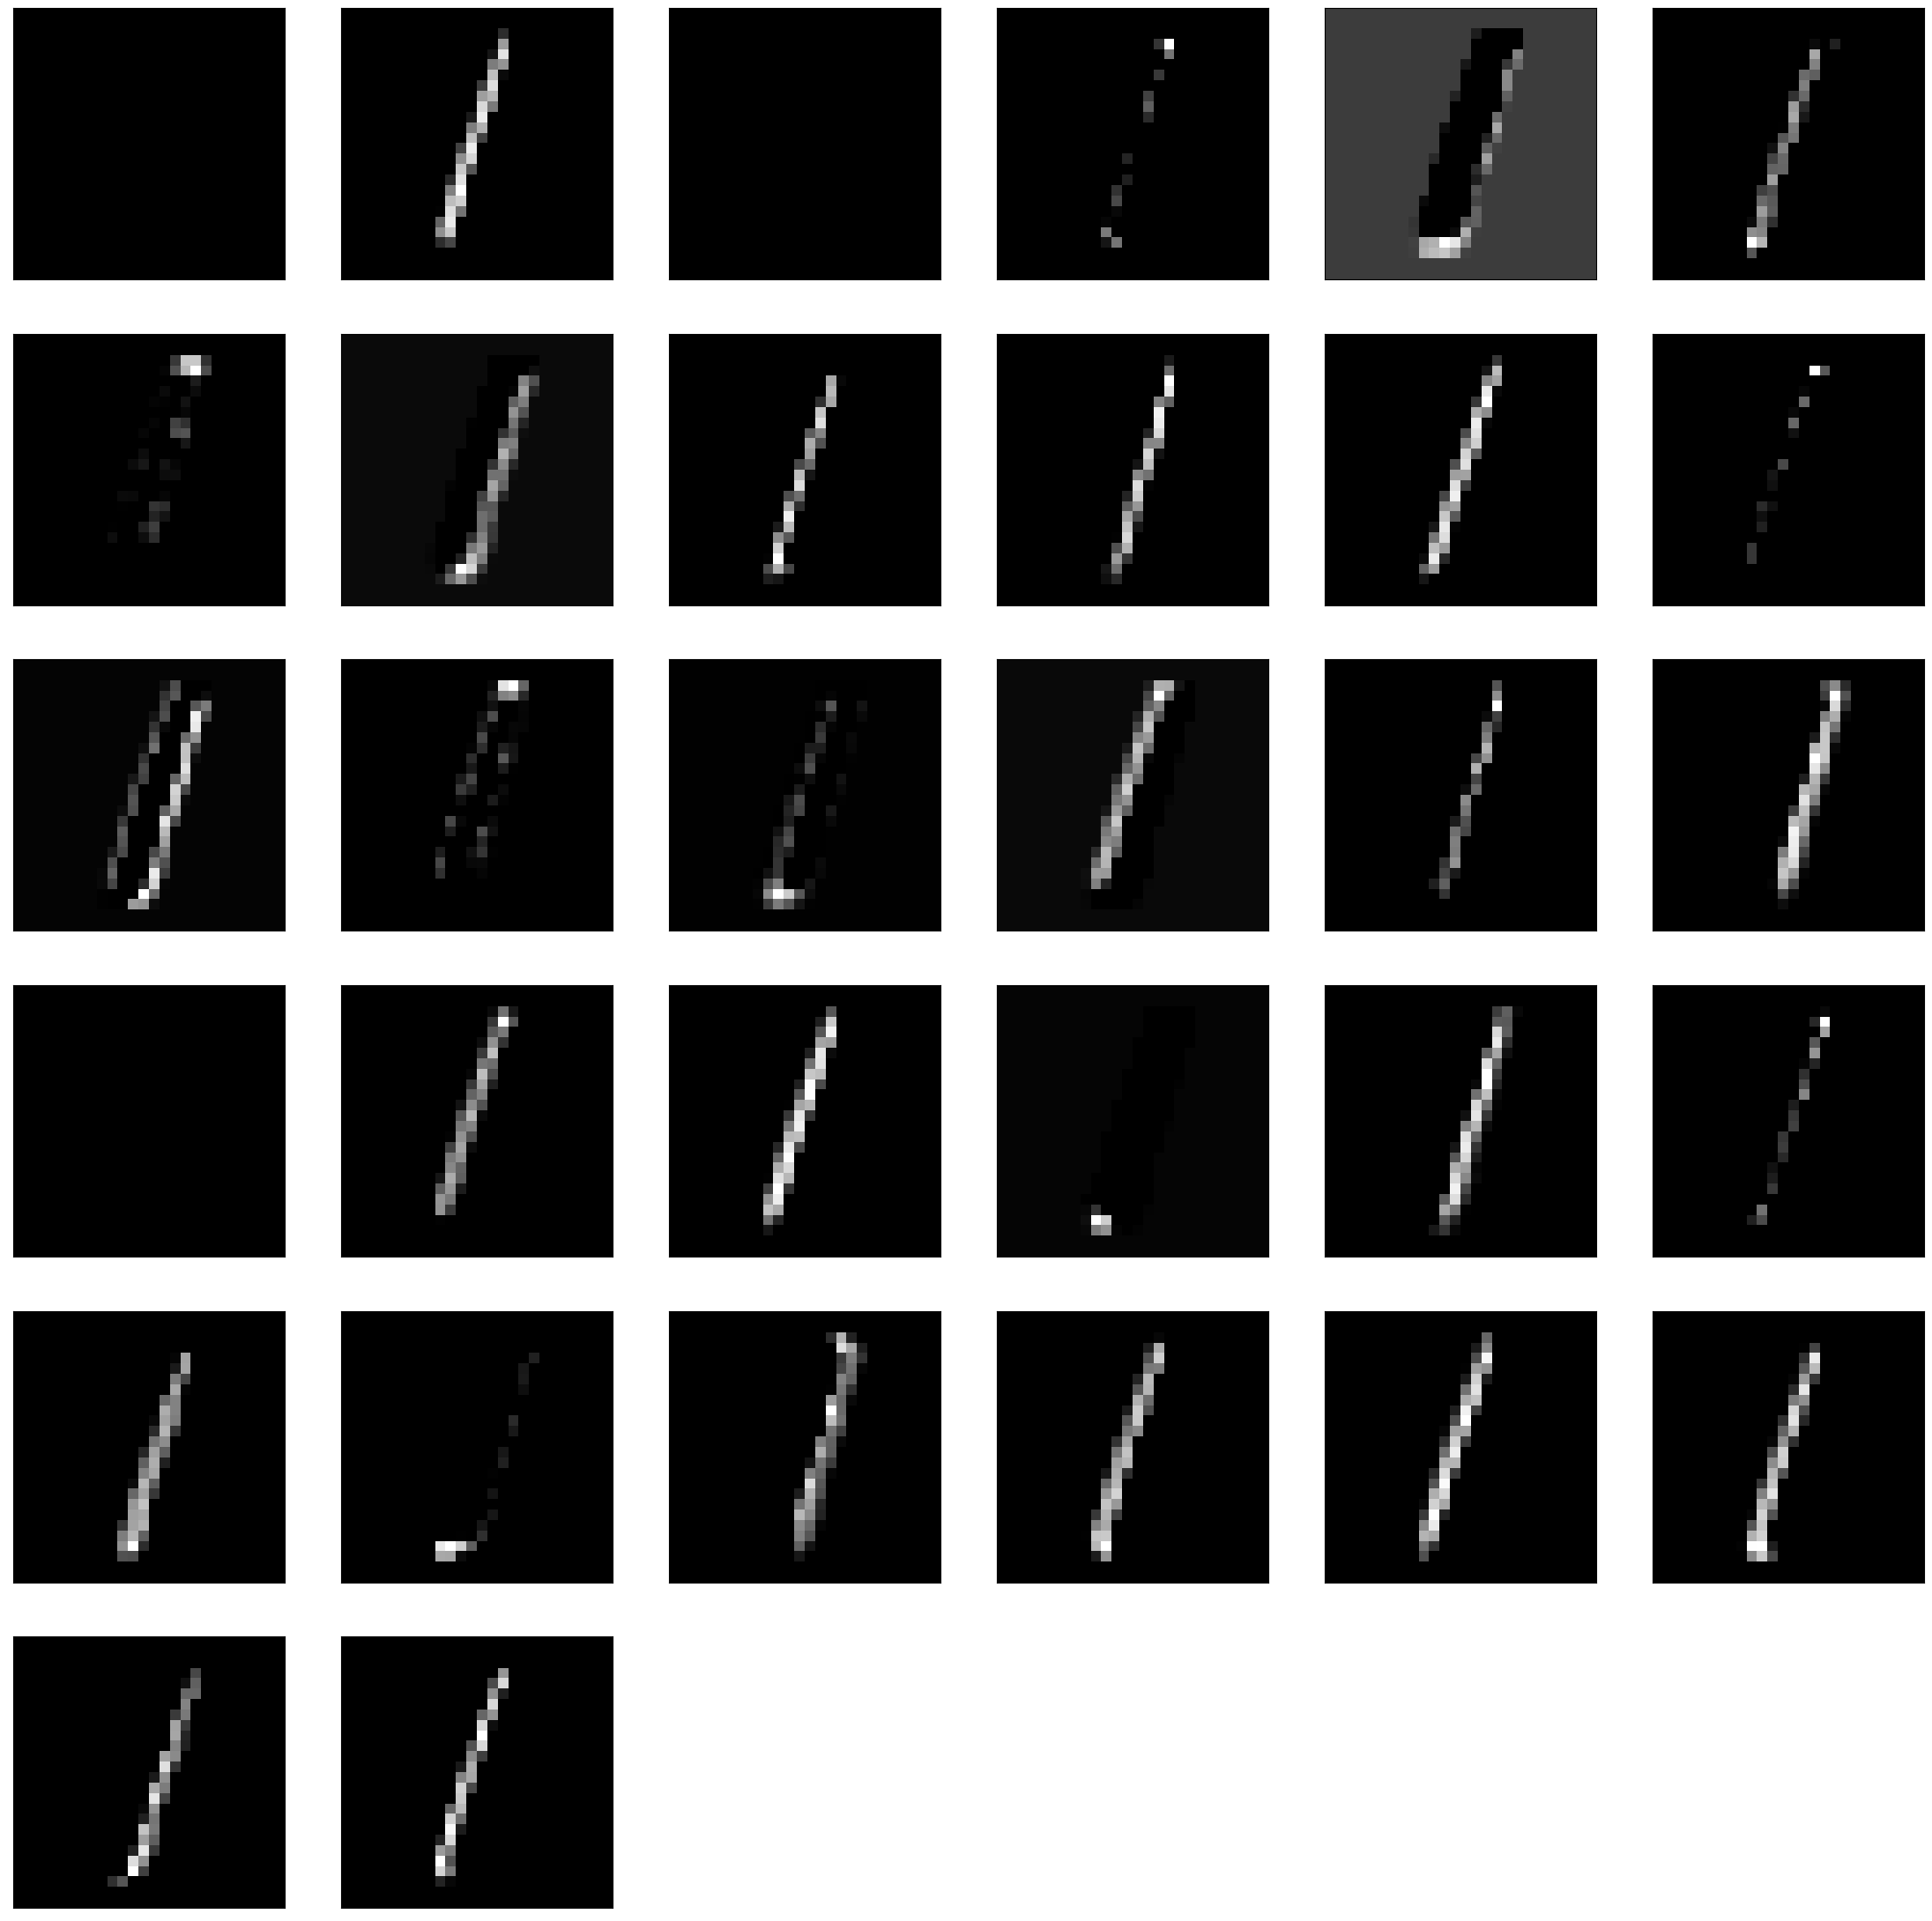

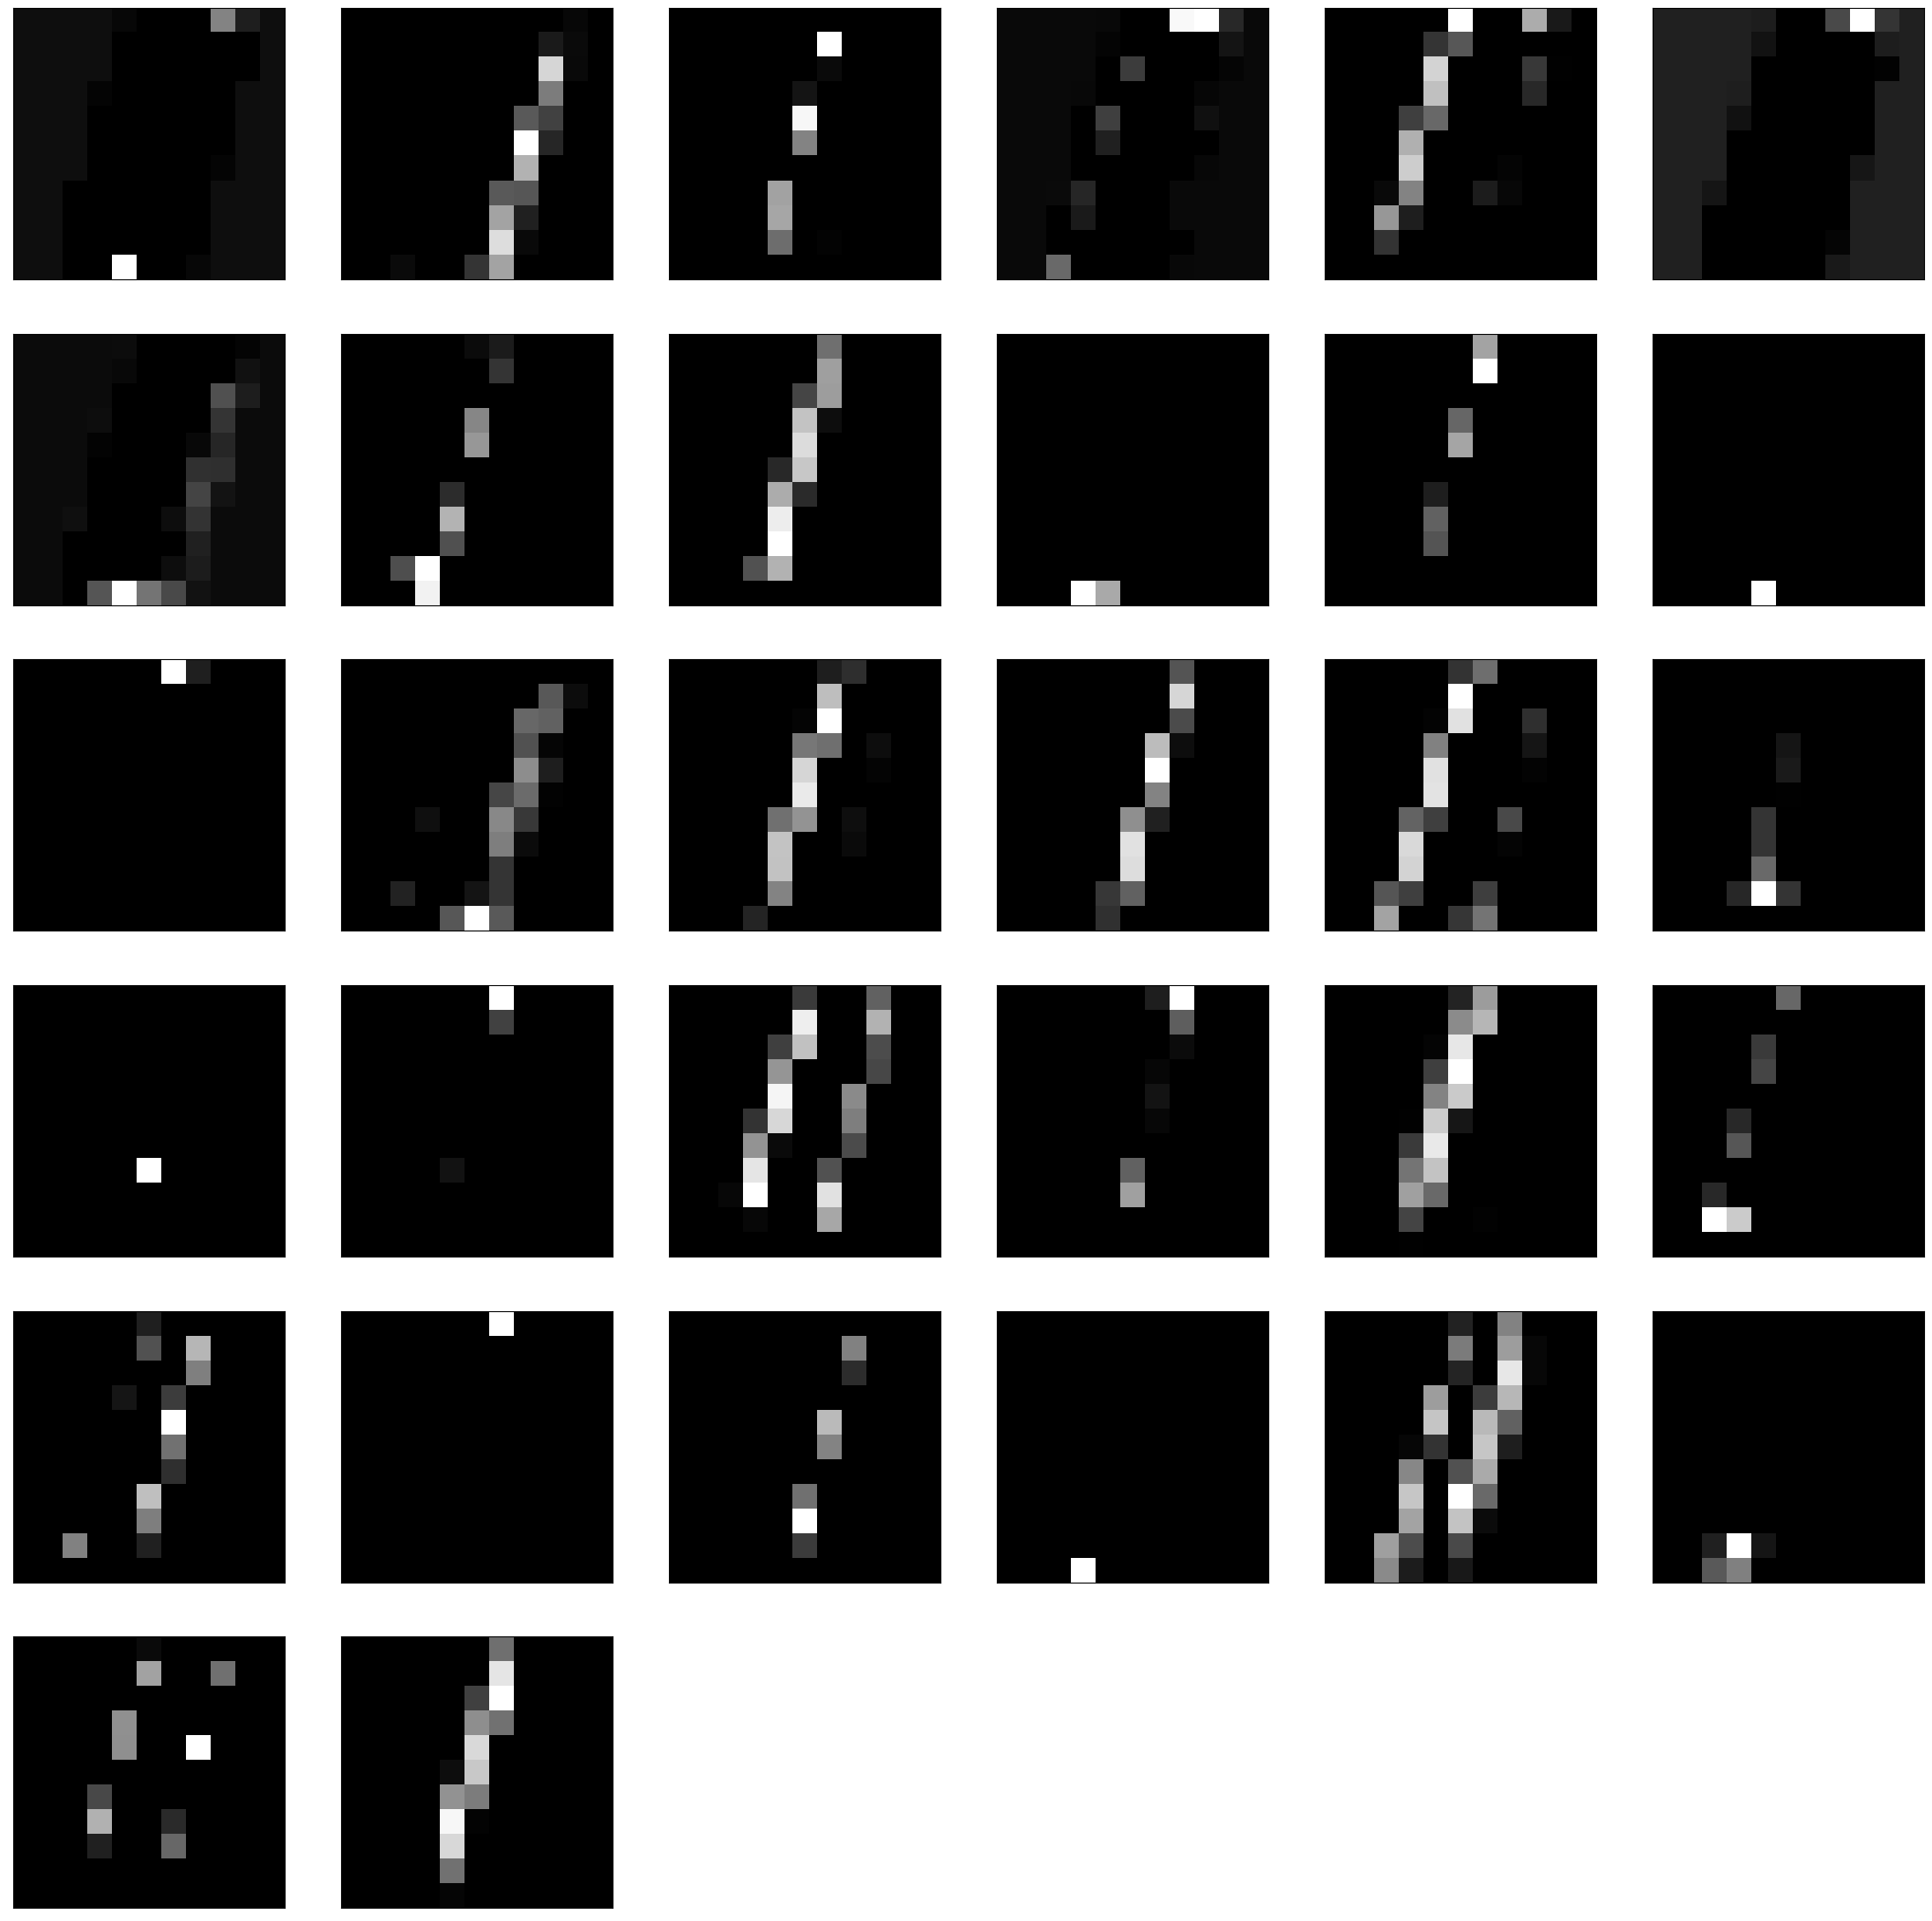

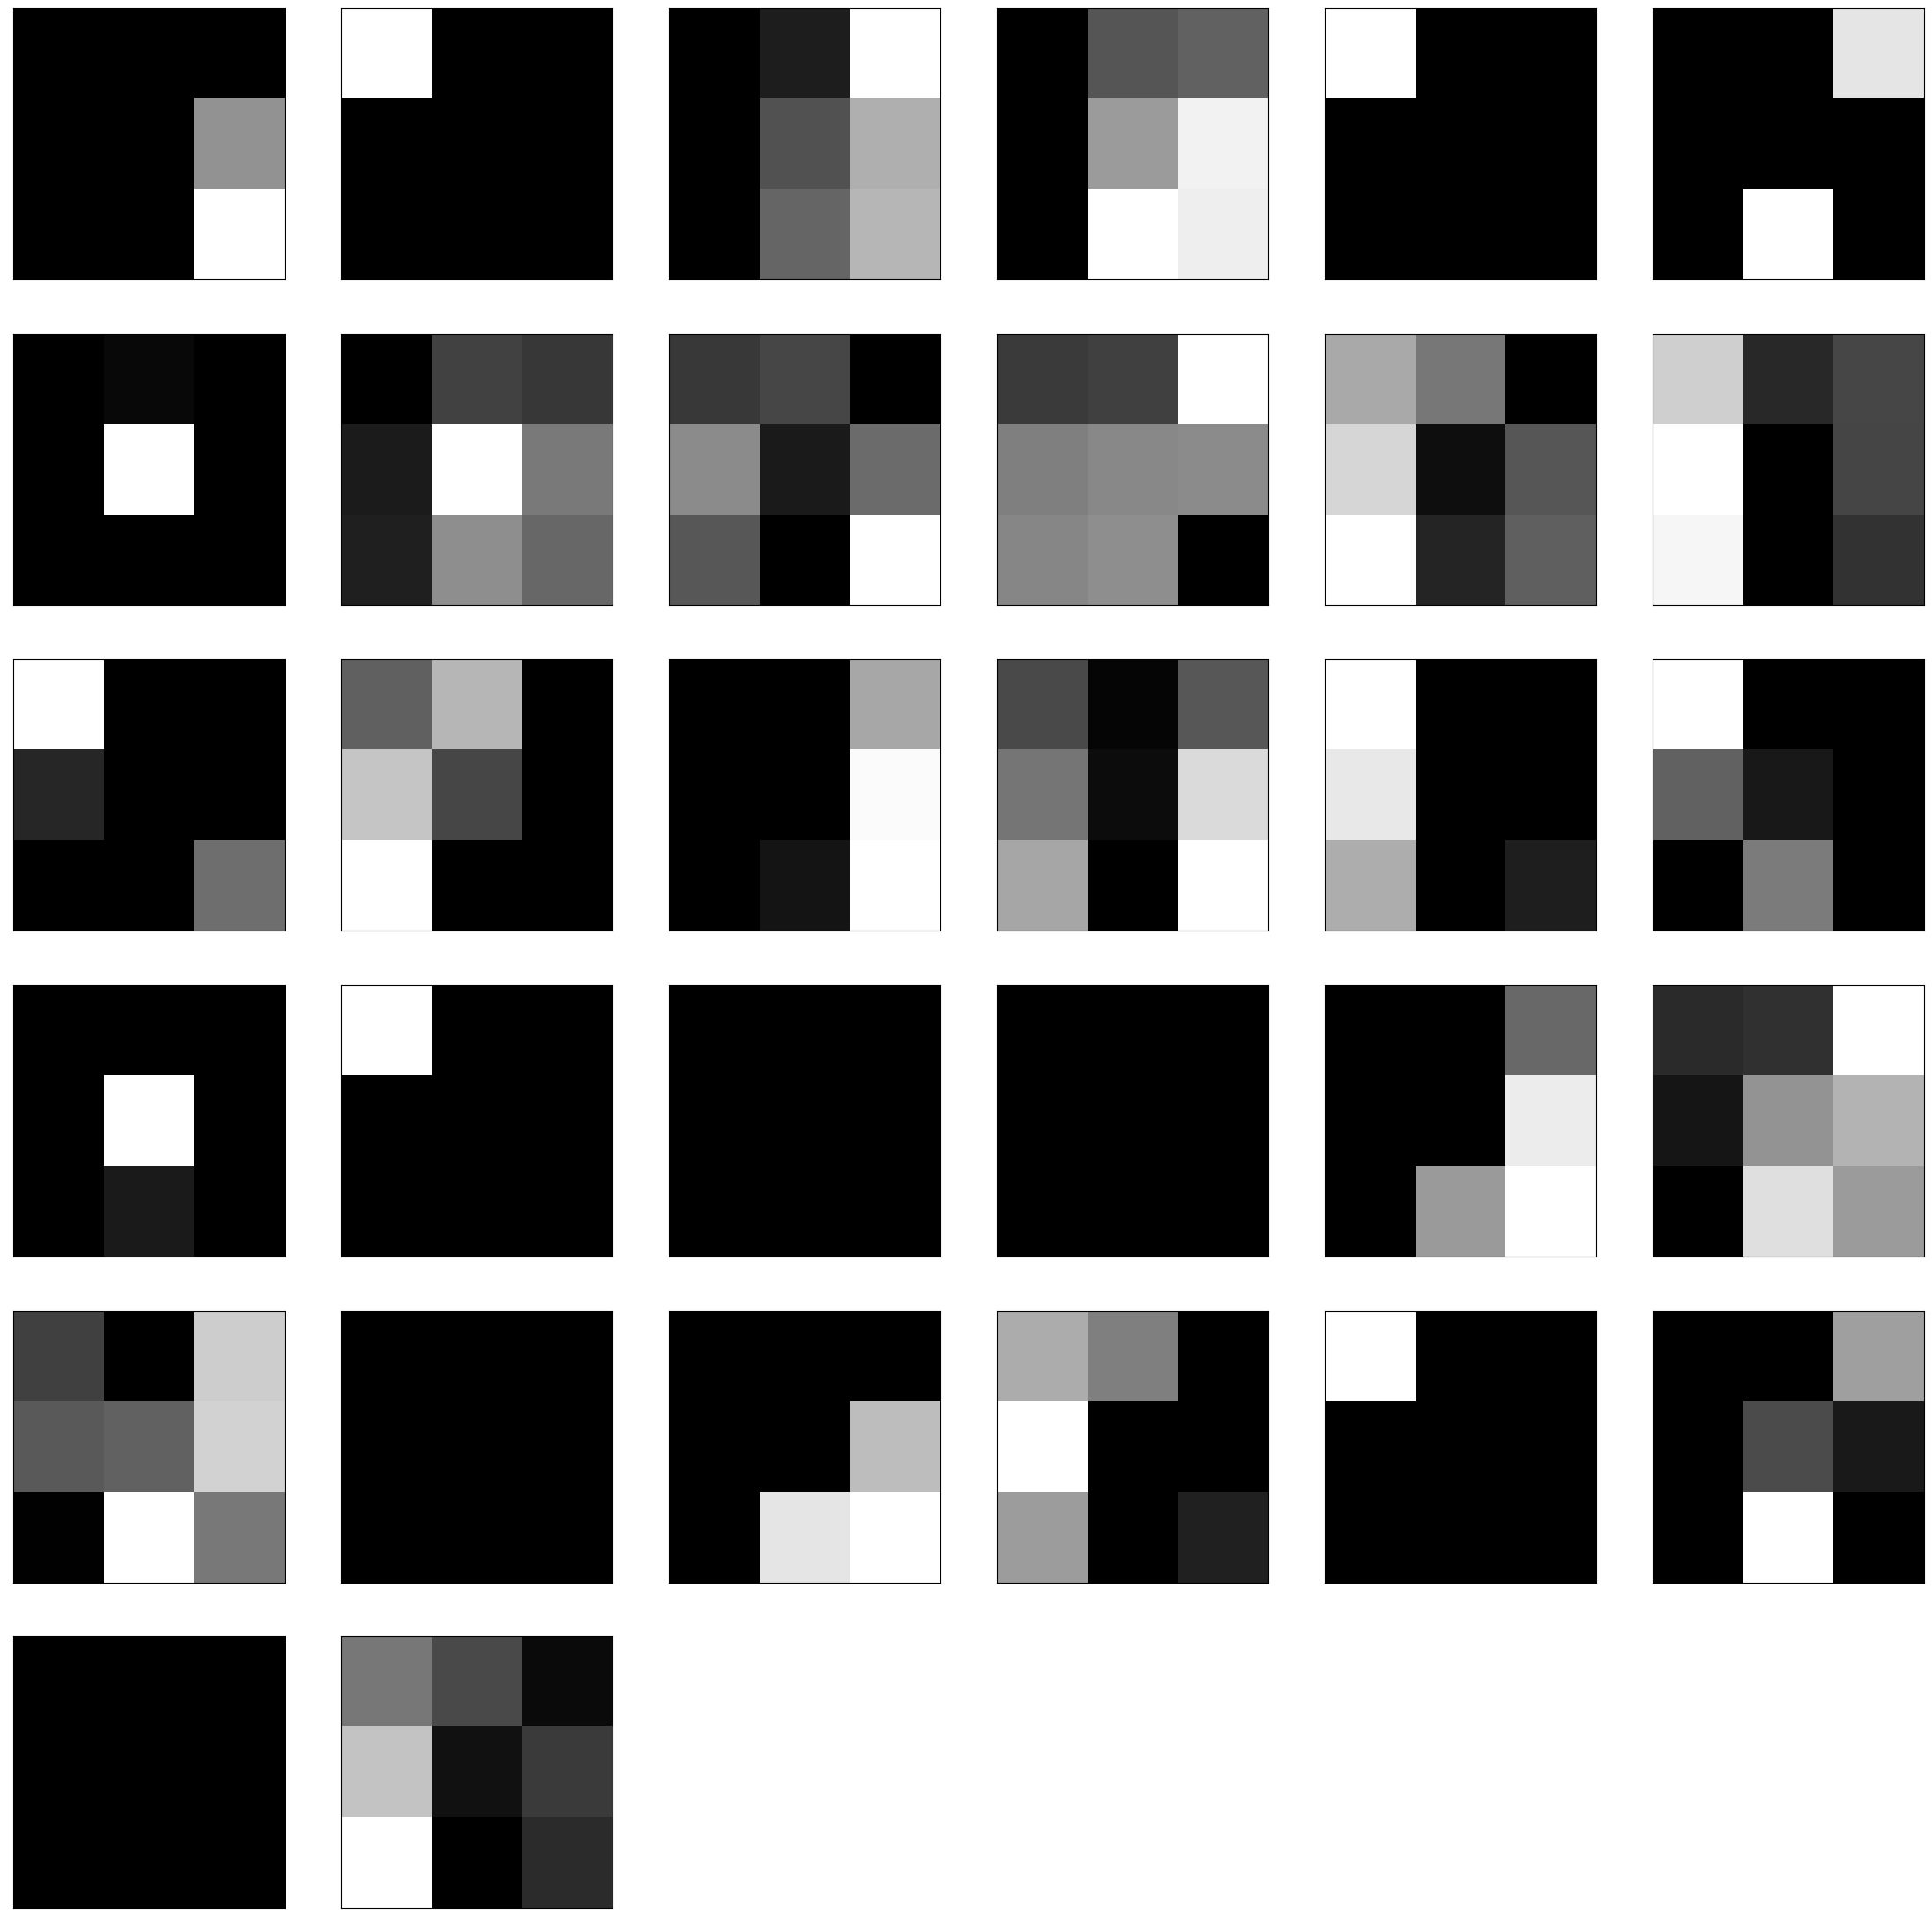

In [47]:
# put an image through the new model to see the output
columns = 6
rows = 6
testImageIndexToTry = 2
testImage = test_images[testImageIndexToTry]
testImage = np.expand_dims(testImage, axis=0)

plt.imshow(printable_test_images[testImageIndexToTry], cmap='gray')

feature_output = model_shortened.predict(testImage)
for the_filter in feature_output:
    figure2 = plt.figure(figsize=(28,28))
    for i in range(1, 32+1):
        figure2 = plt.subplot(rows,columns,i)
        figure2.set_xticks([])
        figure2.set_yticks([])
        plt.imshow(the_filter[0,:,:,i-1], cmap='gray')
    plt.show()
    
# example index numbers
# 3: 30, 32, 44, 51, 63
# 9: 7,9,12,16, 62, 58, 16


1/1 [==============================] - 0s 20ms/step


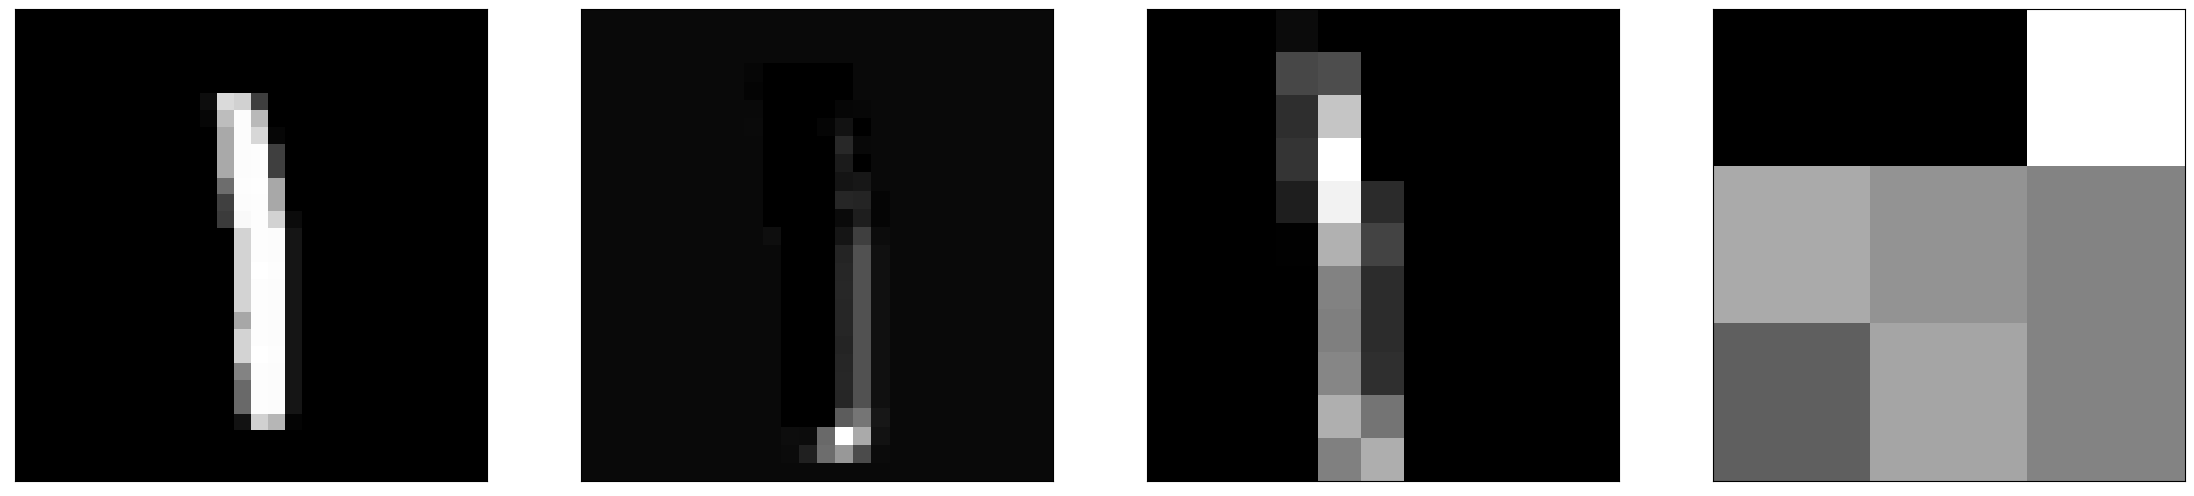

In [48]:
# run filter at (1,1) on an image
columns = 4
rows = 1
testImageIndexToTry = 37
testImage = test_images[testImageIndexToTry]
testImage = np.expand_dims(testImage, axis=0)

figure = plt.figure(figsize=(28,28))
figure = plt.subplot(rows,columns,1)
figure.set_xticks([])
figure.set_yticks([])
plt.imshow(printable_test_images[testImageIndexToTry], cmap='gray')

feature_output = model_shortened.predict(testImage)
i = 2
for the_filter in feature_output:
    figure = plt.subplot(rows,columns,i)
    figure.set_xticks([])
    figure.set_yticks([])
    plt.imshow(the_filter[0,:,:,7], cmap='gray')
    i+=1
plt.show()
    
# example index numbers
# 1: 5, 14, 31, 33, 37, 39, 40
# 3: 30, 32, 44, 51, 63
# 9: 7, 9, 12, 16, 58